In [310]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [311]:
#import df5 from .pkl file
df5 = pd.read_pickle('fixed_band_data.pkl')
df5.head()

,Artist,Country/Market,Years Active,Year of First Record,Claimed Sales,Certified Sales,ARG,AUS,AUT,BEL,...,SWE,SWI,UK,US,FIN,GER,MEX,IRE,PHL,NLD
0,ABBA,Sweden,10,1972,200000000,60700000.0,238000.0,6127000.0,175000.0,380000.0,...,800000.0,600000.0,18970000.0,12700000.0,656319.0,10450000.0,260000.0,NaN,NaN,NaN
1,AC/DC,Australia,45,1975,200000000,113600000.0,594000.0,7540000.0,380000.0,100000.0,...,350000.0,894000.0,4400000.0,79700000.0,321169.0,10300000.0,NaN,NaN,NaN,NaN
2,Adele,United Kingdom,12,2008,100000000,104900000.0,NaN,3955000.0,NaN,795000.0,...,240000.0,510000.0,20550000.0,NaN,151639.0,4700000.0,1490000.0,NaN,NaN,NaN
3,Aerosmith,United States,48,1973,150000000,84700000.0,338000.0,225000.0,125000.0,NaN,...,260000.0,145000.0,3230000.0,70250000.0,101722.0,NaN,230000.0,NaN,NaN,NaN
4,Ayumi Hamasaki,Japan,20,1998,80000000,64300000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
#make dataframe df6 that contains only the 4 countries with most data
df6 = df5.drop(columns=['Artist', 'Country/Market', 'ARG', 'AUT', 'BEL', 'BRA',
       'CAN', 'DEN', 'ITA', 'JPN', 'NZ', 'POL', 'SPA', 'SWE', 'SWI', 'FIN', 'GER', 'MEX', 'IRE', 'PHL', 'NLD'])
df6.head()

,Years Active,Year of First Record,Claimed Sales,Certified Sales,AUS,FRA,UK,US
0,10,1972,200000000,60700000.0,6127000.0,2750000.0,18970000.0,12700000.0
1,45,1975,200000000,113600000.0,7540000.0,4179999.0,4400000.0,79700000.0
2,12,2008,100000000,104900000.0,3955000.0,NaN,20550000.0,NaN
3,48,1973,150000000,84700000.0,225000.0,225000.0,3230000.0,70250000.0
4,20,1998,80000000,64300000.0,NaN,NaN,NaN,NaN


In [315]:
#delete all NaN values, call it a new dataframe df7
df7 = df6.dropna()

In [316]:
#make string columns floats
df7["Year of First Record"]=df7["Year of First Record"].apply(pd.to_numeric)
df7["Claimed Sales"]=df7["Claimed Sales"].apply(pd.to_numeric)
df7["Years Active"]=df7["Years Active"].apply(pd.to_numeric)

In [317]:
#table of correlations
df7.corr()

,Years Active,Year of First Record,Claimed Sales,Certified Sales,AUS,FRA,UK,US
Years Active,1.000000,-0.597677,-0.181378,-0.384822,-0.456339,0.000744,-0.268204,-0.340634
Year of First Record,-0.597677,1.000000,-0.307751,0.122139,0.463614,-0.061993,0.279158,0.023646
Claimed Sales,-0.181378,-0.307751,1.000000,0.817925,0.225598,0.389270,0.413346,0.803576
Certified Sales,-0.384822,0.122139,0.817925,1.000000,0.537754,0.390091,0.605332,0.944842
AUS,-0.456339,0.463614,0.225598,0.537754,1.000000,0.299414,0.644393,0.362564
FRA,0.000744,-0.061993,0.389270,0.390091,0.299414,1.000000,0.491335,0.153753
UK,-0.268204,0.279158,0.413346,0.605332,0.644393,0.491335,1.000000,0.371046
US,-0.340634,0.023646,0.803576,0.944842,0.362564,0.153753,0.371046,1.000000


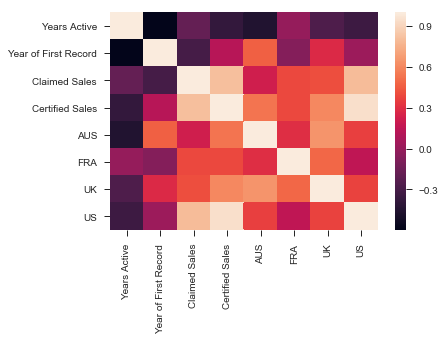

In [318]:
#heatmap to visualize correlations
sns.heatmap(df7.corr());

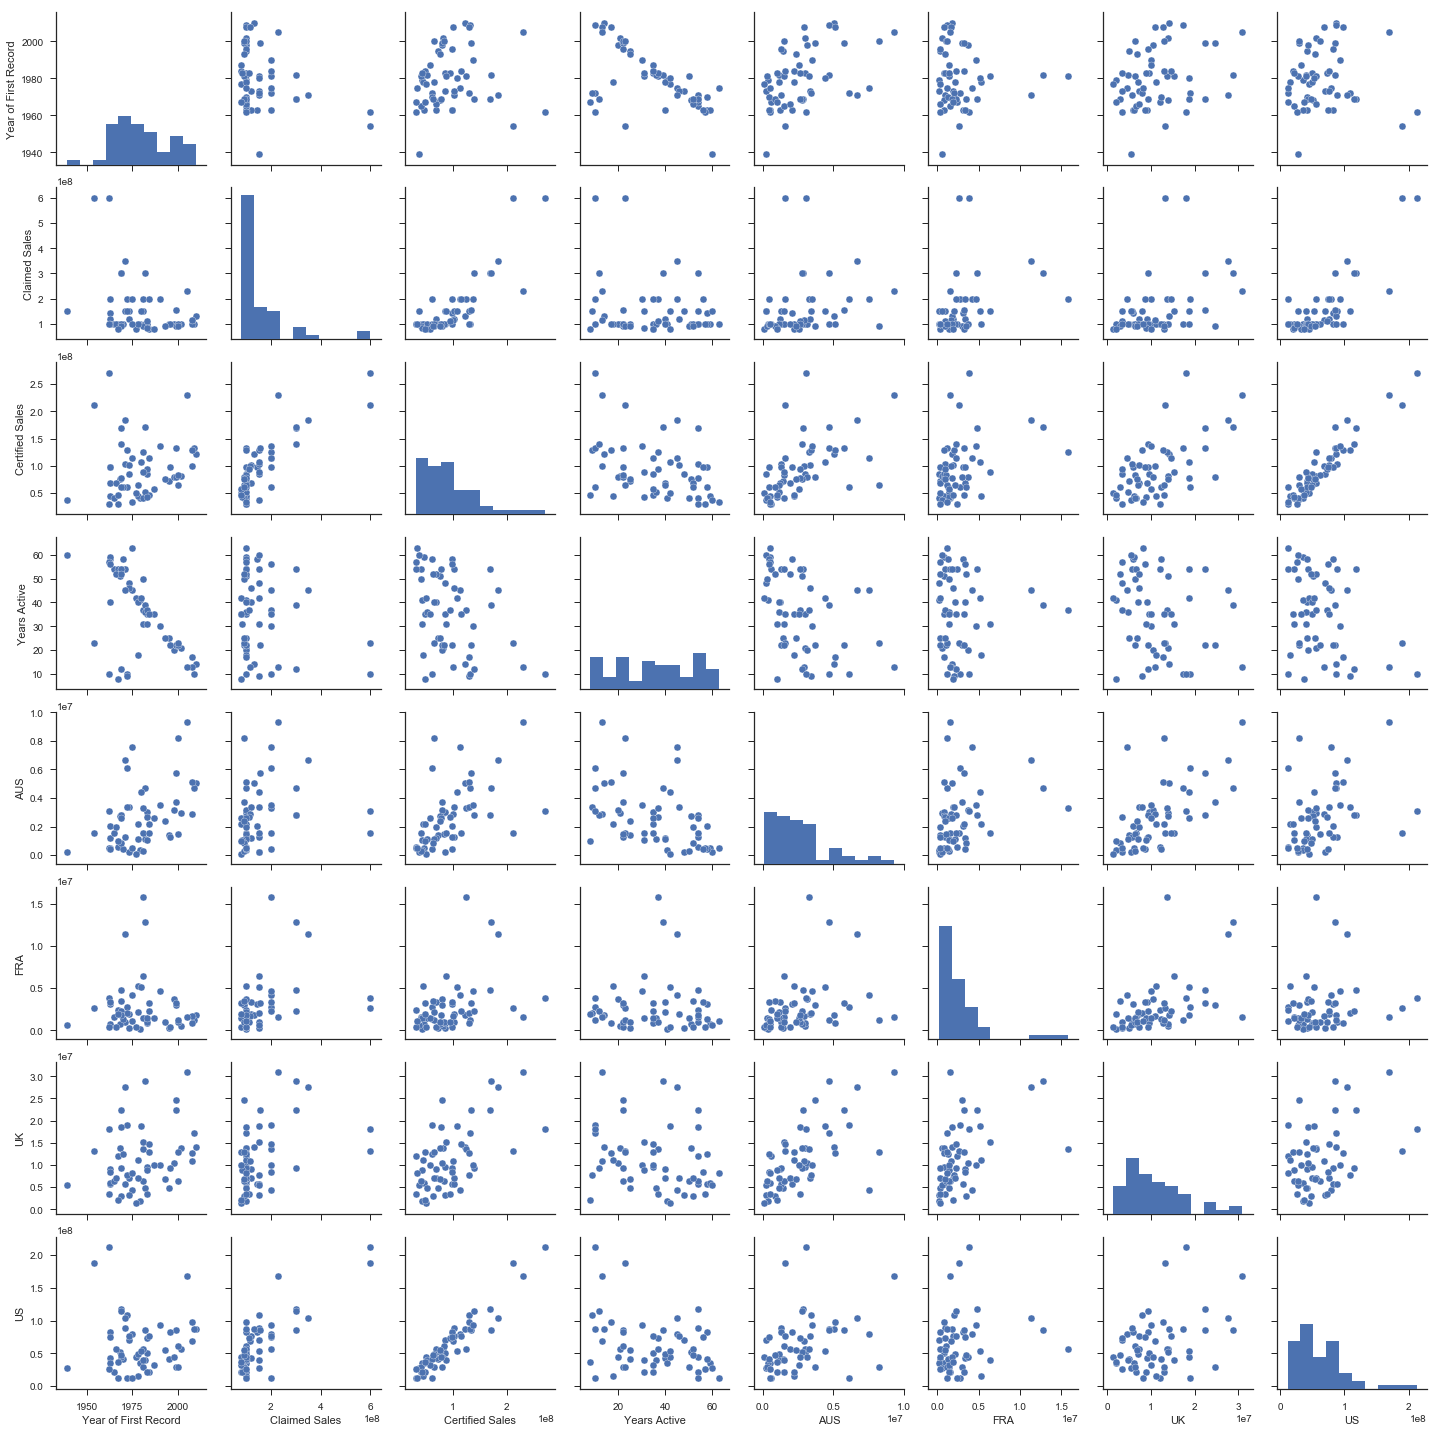

In [319]:
#plot correlations
sns.pairplot(data=df7[["Year of First Record",
                       "Claimed Sales",
                       "Certified Sales",
                       "Years Active",
                       "AUS","FRA","UK","US"]]);

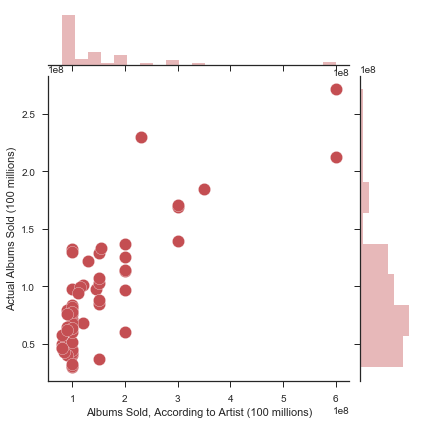

In [323]:
# Plot Certified Sales vs Claimed Sales
a = sns.JointGrid(x="Claimed Sales", y="Certified Sales", data=df7)
a = a.plot_joint(plt.scatter, color="r", s=150, edgecolor="white")
a = a.plot_marginals(sns.distplot, kde=False, color="r")
a = a.set_axis_labels(xlabel="Albums Sold, According to Artist (100 millions)",ylabel="Actual Albums Sold (100 millions)")

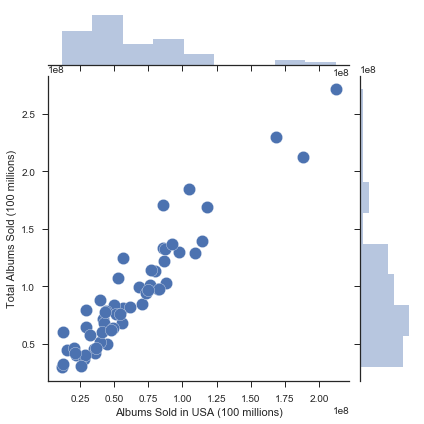

In [324]:
# Plot each of the features, and how they relate to Actual Albums Sold

b = sns.JointGrid(x="US", y="Certified Sales", data=df7)
b = b.plot_joint(plt.scatter, color="b", s=150, edgecolor="white")
b = b.plot_marginals(sns.distplot, kde=False, color="b")
b = b.set_axis_labels(xlabel="Albums Sold in USA (100 millions)",ylabel="Total Albums Sold (100 millions)")

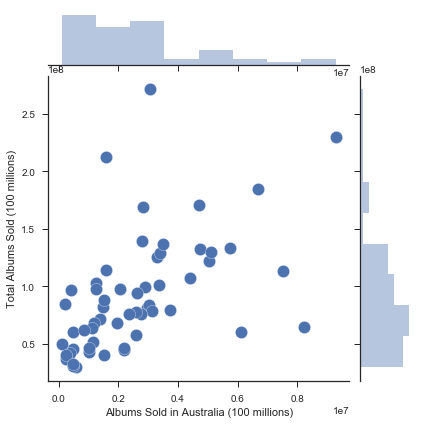

In [325]:
c = sns.JointGrid(x="AUS", y="Certified Sales", data=df7)
c = c.plot_joint(plt.scatter, color="b", s=150, edgecolor="white")
c = c.plot_marginals(sns.distplot, kde=False, color="b")
c = c.set_axis_labels(xlabel="Albums Sold in Australia (100 millions)",ylabel="Total Albums Sold (100 millions)")

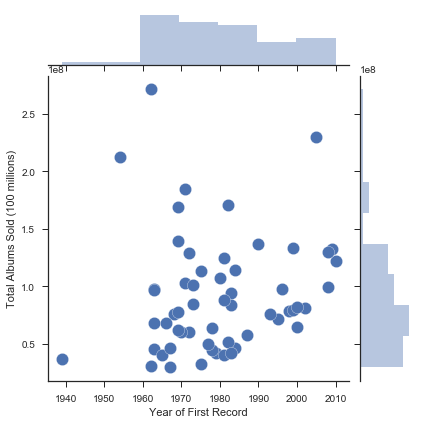

In [326]:
d = sns.JointGrid(x="Year of First Record", y="Certified Sales", data=df7)
d = d.plot_joint(plt.scatter, color="b", s=150, edgecolor="white")
d = d.plot_marginals(sns.distplot, kde=False, color="b")
d = d.set_axis_labels(xlabel="Year of First Record",ylabel="Total Albums Sold (100 millions)")

In [327]:
#rename columns so there are no spaces
df7 = df7.rename(index=str, columns={"Years Active": "Years", 
                               "Claimed Sales": "Claimed", 
                               "Certified Sales": "Sales", 
                               "Year of First Record": "Start"})
df7.head()

,Years,Start,Claimed,Sales,AUS,FRA,UK,US
0,10,1972,200000000,60700000.0,6127000.0,2750000.0,18970000.0,12700000.0
1,45,1975,200000000,113600000.0,7540000.0,4179999.0,4400000.0,79700000.0
3,48,1973,150000000,84700000.0,225000.0,225000.0,3230000.0,70250000.0
6,25,1995,100000000,72000000.0,1400000.0,325000.0,4875000.0,41500000.0
7,58,1963,145000000,97400000.0,2047000.0,3150000.0,5765000.0,82450000.0


In [333]:
y2, X2 = patsy.dmatrices('Sales ~ Start + Claimed + AUS + US', data=df7, return_type="dataframe")

model = sm.OLS(y2, X2)
fit2 = model.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     302.4
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           2.55e-35
Time:                        14:40:02   Log-Likelihood:                -1000.9
No. Observations:                  57   AIC:                             2012.
Df Residuals:                      52   BIC:                             2022.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -7.39e+08   2.56e+08     -2.883      0.006   -1.25e+09   -2.25e+08
Start       3.781e+05    1.3e+05      2.916      0.005    1.18e+05    6.38e+05
Claimed        0.1463      0.028      5.289      0.000       0.091       0.202
AUS            4.5284      0.852      5.315      0.000       2.819       6.238
US             0.7792      0.067     11.645      0.000       0.645       0.914
==============================================================================
Omnibus:                        4.737   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                5.835
Skew:                           0.078   Prob(JB):                       0.0541
Kurtosis:                       4.560   Cond. No.                     3.57e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [334]:
# Use sklearn to fit a linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV

lr=LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)

lr.fit(X_train, y_train)   #fit on train
lr.score(X_test, y_test)   #score on test

0.89287125714202453

In [335]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

alphabetas=[1e-2, 1e-1, 1, 1e1, 1e2]
MSE = []

for a in alphabetas:
    encv = ElasticNetCV(cv=10, alphas = [a])
    print("alpha is: "+str(a)+" and R^2 is: "+str(encv.fit(X1,y1).score(X1,y1)))
    print("Mean Squared Error: "+str(mean_squared_error(y1, encv.predict(X1))))
    print("----")
    MSE.append(mean_squared_error(y1, encv.predict(X1)))

alpha is: 0.01 and R^2 is: 0.961813432604
Mean Squared Error: 9.70774058316e+13
----
alpha is: 0.1 and R^2 is: 0.961813426846
Mean Squared Error: 9.7077420469e+13
----
alpha is: 1 and R^2 is: 0.961812859455
Mean Squared Error: 9.70788628829e+13
----
alpha is: 10.0 and R^2 is: 0.961763590787
Mean Squared Error: 9.72041130644e+13
----
alpha is: 100.0 and R^2 is: 0.960030244801
Mean Squared Error: 1.0161060318e+14
----


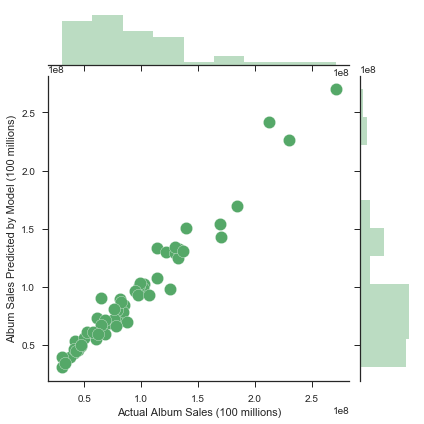

In [336]:
y_predicted = fit2.predict(X2)

g = sns.JointGrid(x=df7["Sales"], y=fit2.predict(X2), data=df7)
g = g.plot_joint(plt.scatter, color="g", s=150, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
g = g.set_axis_labels(xlabel="Actual Album Sales (100 millions)",ylabel="Album Sales Predicted by Model (100 millions)")

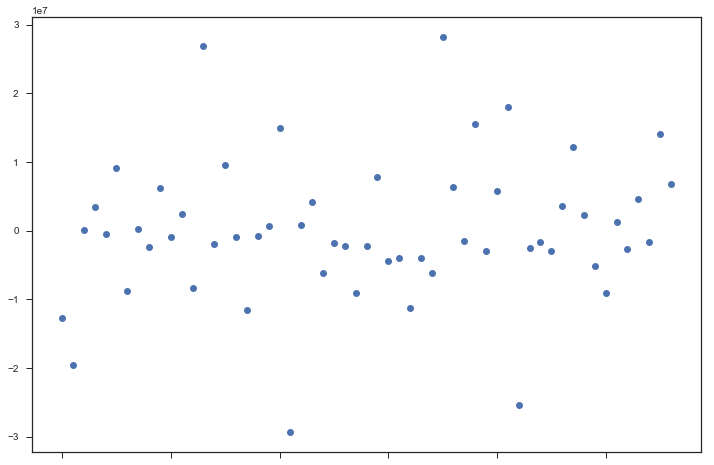

In [332]:
fit2.resid.plot(style='o', figsize=(12,8));